<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 175.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 137.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [55]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [56]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [57]:
## Write your code here
df.duplicated(subset=['Age','Employment','RemoteWork','CodingActivities','EdLevel','LearnCode','LearnCodeOnline','MainBranch'],keep=False).value_counts()
df=df.drop_duplicates(subset=['Age','Employment','RemoteWork','CodingActivities','EdLevel','LearnCode','LearnCodeOnline','MainBranch'])

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [71]:
## Write your code here
missing_value=df['CodingActivities'].isnull()
print('There are ', missing_value, ' missing values in the CodingActivities column')

There are  0        False
1        False
2        False
3         True
4         True
         ...  
65430    False
65431    False
65432    False
65434    False
65435    False
Name: CodingActivities, Length: 60010, dtype: bool  missing values in the CodingActivities column


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [ ]:
## Write your code here
df['CodingActivities'] = df['CodingActivities'].ffill()
df['CodingActivities'].isnull().any()

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [ ]:
## Write your code here
print(df['ConvertedCompYearly'].isnull().sum())

In [ ]:
most_freq=df['ConvertedCompYearly'].mode()[0]

In [59]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(most_freq)
df['ConvertedCompYearly'].isnull().sum()

np.int64(0)

In [75]:
df['ConvertedCompYearly'].describe()

count    6.001000e+04
mean     7.255591e+04
std      1.168423e+05
min      1.000000e+00
25%      6.444400e+04
50%      6.444400e+04
75%      6.444400e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [60]:
## Write your code here
# Normalize the ConvertedCompYearly column using min-max scaling
df['ConvertedCompYearly_MinMax'] = (
    df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()
) / (
    df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min()
)


In [61]:
df['ConvertedCompYearly_MinMax'].describe()

count    60010.000000
mean         0.004463
std          0.007187
min          0.000000
25%          0.003964
50%          0.003964
75%          0.003964
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [65]:
## Write your code here
mean = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Z'] = (df['ConvertedCompYearly'] - mean) / std

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Z']].head())

   ConvertedCompYearly  ConvertedCompYearly_Z
0              64444.0              -0.069426
1              64444.0              -0.069426
2              64444.0              -0.069426
3              64444.0              -0.069426
4              64444.0              -0.069426


In [79]:
outliers = df[abs(df['ConvertedCompYearly_Z']) > 3]
outliers.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Z
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0,0.039984,4.942081
594,595,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,20.0,5.0,0.0,Appropriate in length,Easy,432000.0,8.0,0.026574,3.076318
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0,0.061513,7.937572
920,921,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,25.0,30.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,500000.0,7.0,0.030757,3.658299
1081,1082,I am a developer by profession,55-64 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;How-to ...,...,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,500000.0,NaN,0.030757,3.658299


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


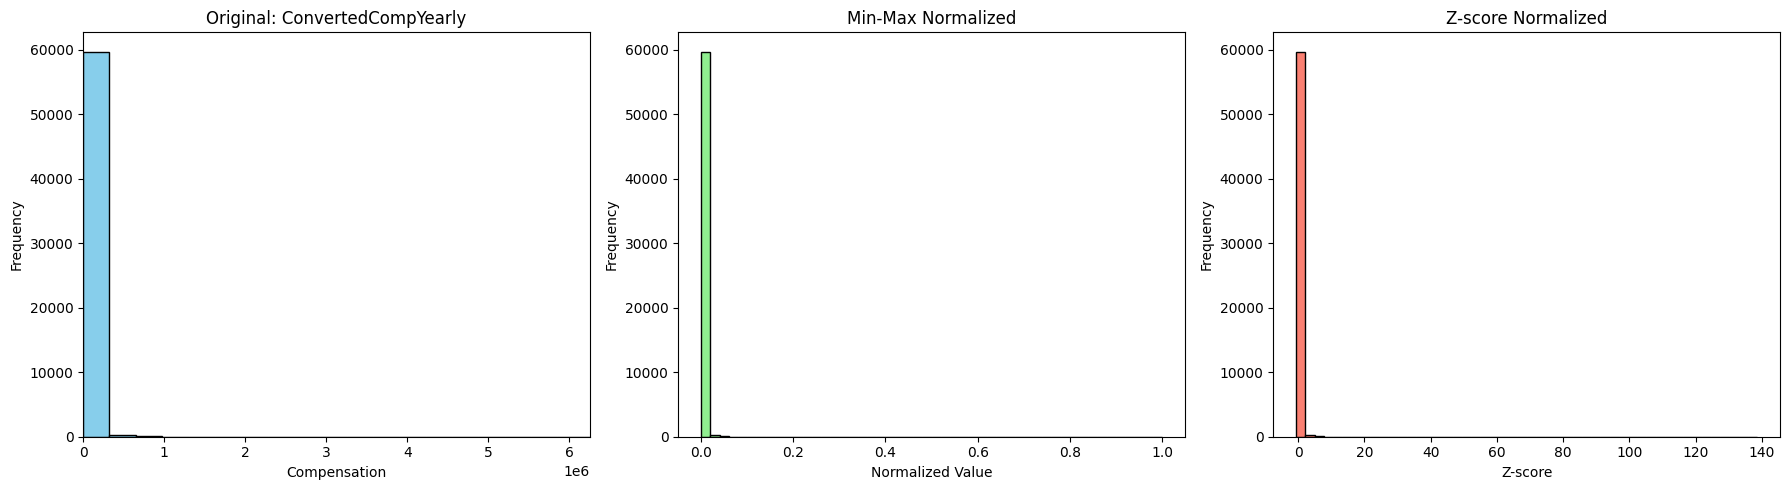

In [83]:
## Write your code her
plt.figure(figsize=(18, 5))

# Original
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.xlim(0,6256603)  # Set x-axis range from 0 to 200,000
plt.title('Original: ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

# Z-score Normalized
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Z'], bins=50, color='salmon', edgecolor='black')
plt.title('Z-score Normalized')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
